In [1]:
%pylab inline
#Import code from previous videos:
from NNcode import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import optimize

In [3]:
NN = Neural_Network()

In [4]:
T = trainer(NN)

In [5]:
import timeit

start = timeit.default_timer()

T.train(X,y)

stop = timeit.default_timer()

print (stop - start)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 74
         Function evaluations: 78
         Gradient evaluations: 78
0.035469932001433335


In [6]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


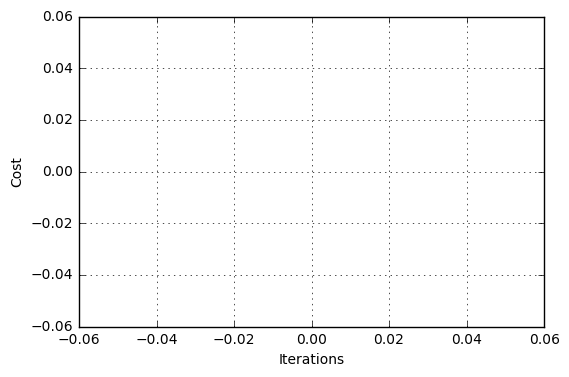

In [7]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [8]:

import timeit

start = timeit.default_timer()

NN.costFunctionPrime(X,y)

stop = timeit.default_timer()

print (stop - start)

0.00017591999494470656


In [9]:
NN.costFunctionPrime(X,y)

(array([[ -1.10885309e-10,   7.10504820e-12,  -5.42526420e-06],
        [  3.51094351e-10,  -3.49594831e-11,  -1.24109791e-06]]),
 array([[  2.41066036e-06],
        [  2.41064075e-06],
        [  2.30246208e-07]]))

In [10]:
NN.forward(X)

array([[ 0.58001955],
       [ 0.52000289],
       [ 0.91001929],
       [ 0.79997092]])

In [11]:
y

array([[ 0.58],
       [ 0.52],
       [ 0.91],
       [ 0.8 ]])

In [12]:
#Test network for various combinations of sleep/study:
Day1Price = linspace(1, 200, 100)
Day2Price = linspace(1, 200, 100)

#Normalize data (same way training data way normalized)
Day1PriceNorm = Day1Price/100.
Day2PriceNorm = Day2Price/100.

#Create 2-d versions of input for plotting
a, b  = meshgrid(Day1PriceNorm, Day2PriceNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 1))
allInputs[:, 0] = a.ravel()
allInputs[:, 0] = b.ravel()



In [13]:
allOutputs = NN.forward(allInputs)

ValueError: shapes (10000,1) and (2,3) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
#Contour Plot:
yy = np.dot(Day2Price.reshape(100,1), np.ones((1,100)))
xx = np.dot(Day1Price.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('x')
ylabel('y')

In [ ]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')